# Final Project
## Tasks:
###### Learn about the network dataset you've been assigned. Describe it for us.
What are the nodes?
#### How many nodes are there?
What are the edges?
#### How many edges are there?
Is it weighted or unweighted?
If weighted, what do the weights represent/mean?
Directed or undirected?
#### Is it connected or disconnected? if disconnected, is there a giant component?
#### Is there anything interesting or weird about it?
What's the context of this network?
Do you have access to any metadata about the nodes?

1. Create an adjacency matrix for your matrix using your .csv file
2. Plot your network
3. Find the most central node(s) in your network
    Do so for each of the four centrality metrics we've discussed in class.
        Plot your network with a different colour for each "most central" node
    Do the centrality metrics identify different node(s) as the "most central"?
    Given the context of your dataset, interpret which centrality metric you think is most informative. Explain.
6. Find and plot the communities in your network
    We've only discussed one graph partitioning algorithm to do this: Girvan-Newman.
    Do the identified communities make sense given the context of your data?



### Importing packages

In [13]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

### Import network data

In [15]:
MF_0 = np.load("MF_0.npy")
MF_1 = np.load("MF_1.npy")
MF_2 = np.load("MF_2.npy")
MF_3 = np.load("MF_3.npy")
MF_4 = np.load("MF_4.npy")
MF_5 = np.load("MF_5.npy")
MF_6 = np.load("MF_6.npy")
MF_7 = np.load("MF_7.npy")
MF_8 = np.load("MF_8.npy")
MF_9 = np.load("MF_9.npy")
MF_10 = np.load("MF_10.npy")
MF_11 = np.load("MF_11.npy")
Gender = pd.read_csv("MF_gender.csv")
Caste = pd.read_csv("MF_caste.csv")
Age = pd.read_csv("MF_age.csv")
# The Or network that I will most likely be using:
MF_OR = np.load("MF_OR.npy")

### Exploring the data
#### Number of edges, nodes, whether graph is connected, inspecting components

In [134]:
#Number of edges:
num_edges = np.sum(np.sum(MF_OR, axis = 0))
print("There are", num_edges,"edges in the OR network")
#Numebr of nodes:
num_nodes = len(MF_OR)
print("There are", num_nodes, "nodes in the OR network")

There are  736.0  edges in the OR network
There are 110 nodes in the OR network


In [135]:
Or_G_undir = nx.to_networkx_graph(MF_OR)
print("Is the OR network connected?", nx.is_connected(Or_G_undir))

Is the OR network connected? False


In [136]:
components = list(nx.connected_components(Or_G_undir))
print("Here are the different components:", components)

Here are the different components: [{0, 1, 2, 3, 4, 5, 6, 7, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109}, {8, 9, 10, 11}]


#### It appears that all the nodes except for 8, 9, 10, and 11 are one component, and nodes 8, 9, 10, and 11 are another component- so the network is disconnected.
#### It's interesting that in a village, four people who form their own component are completed unrelated to any other person in the village.

### Exploring the anomalous nodes' metadata (nodes 8, 9, 10, 11):

In [116]:
print("8 has gender value", Gender.iloc[8][0])
print("9 has gender value", Gender.iloc[9][0])
print("10 has gender value", Gender.iloc[10][0])
print("11 has gender value", Gender.iloc[11][0])
# two men, two women

print("8 is age", Age.iloc[8][0])
print("9 is age", Age.iloc[9][0])
print("10 is age", Age.iloc[10][0])
print("11 is age", Age.iloc[11][0])
#ages 40, 30, 56 and 40

print("8 has caste value", Caste.iloc[8][0])
print("9 has caste value", Caste.iloc[9][0])
print("10 has caste value", Caste.iloc[10][0])
print("11 has caste value", Caste.iloc[11][0])
#8,9 are Scheduled Class, 10,11 are OBC

8 has gender value 1
9 has gender value 2
10 has gender value 1
11 has gender value 2
8 is age 40
9 is age 30
10 is age 56
11 is age 40
8 has caste value 1
9 has caste value 1
10 has caste value 0
11 has caste value 0


#### My prediction at this time is that 8,9 and 10,11 are couples that live isolated from the rest of their tribe

#### Within the smaller relation data, are these four ever split into a smaller subgroup?

In [132]:
#Borrow money?
MF_0_G = nx.to_networkx_graph(MF_0)
components_0 = list(nx.connected_components(MF_0_G))
# In this smaller network, {8, 9, 10, 11} are their own component
#Get advice?
MF_1_G = nx.to_networkx_graph(MF_1)
components_1 = list(nx.connected_components(MF_1_G))
#Yes
#Borrow material goods?
MF_3_G = nx.to_networkx_graph(MF_3)
components_3 = list(nx.connected_components(MF_3_G))
#Yes
#Kin?
MF_8_G = nx.to_networkx_graph(MF_8)
components_8 = list(nx.connected_components(MF_8_G))
#Yes, they are related to just each other and nobody else
#non-relative socializing:
MF_7_G = nx.to_networkx_graph(MF_7)
components_7 = list(nx.connected_components(MF_7_G))
#Yes...???

#### Suprisingly enough, all four nodes continue to be their own subgroup rather than splitting when name non-relative community members with whom they socialize. Since they all named each other as kin this seems untrue. This leads me to believe that this is an error in the data collection. It's possible that this family didn't want to take the time in filling out the survey, maybe the head of the house filled it out for all members and did it incorrectly, etc.

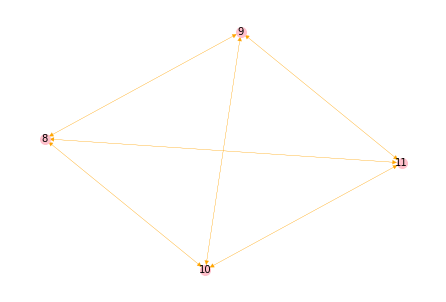

In [131]:
Or_G = nx.to_networkx_graph(MF_x_G, create_using = nx.DiGraph) #x is the relation being viewed (0,1,2.. etc.)
Family = nx.subgraph(Or_G, [8,9,10,11])
nx.draw(Family, node_color='pink', node_size=100, edge_color='orange', width = 0.2, with_labels=True, font_size = 10)
#all the nodes are mutual

#### Additionally, as seen in the network graph above, these four mutually relate to one other for every sub-relation no matter what, further proving that this is a datat collection issue

### 1. Creating an adjacency matrix

In [43]:
#print(MF_OR): Only gives truncated version of adjacency matrix
#np.shape(MF_OR): The array is 110x110 so maybe we prefer the truncated version
#list(MF_OR): Returns full matrix, but it's quite large and not visually helpful

### 2. Plotting the network
#### *Directed network

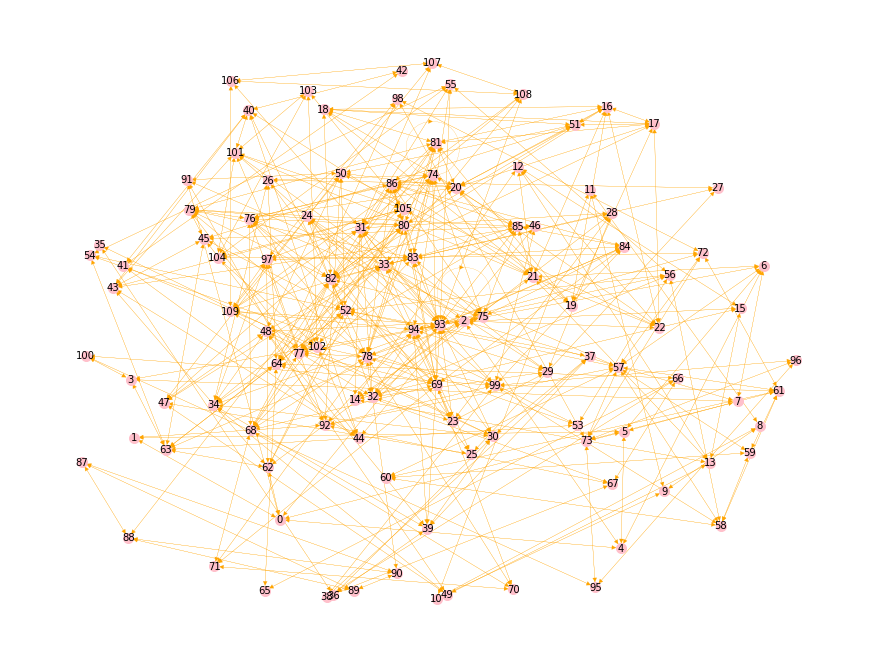

In [71]:
Or_G = nx.to_networkx_graph(MF_OR, create_using = nx.DiGraph)
pos = nx.spring_layout(Or_G, k=1)
plt.figure(figsize = (12,9) )
nx.draw(Or_G, pos, node_color='pink', node_size=100, edge_color='orange', width = 0.2, with_labels=True, font_size = 10)

### 3. Finding the central most nodes

In [68]:
deg_cen = nx.degree_centrality(Or_G)
close_cen = nx.closeness_centrality(Or_G)
eig_cen = nx.eigenvector_centrality(Or_G)
betw_cen = nx.betweenness_centrality(Or_G)

print('The person with highest degree centrality is', max(deg_cen, key=lambda key: deg_cen[key]))
print('The person with highest closeness centrality is', max(close_cen, key=lambda key: close_cen[key]))
print('The person with highest eigenvector centrality is', max(eig_cen, key=lambda key: eig_cen[key]))
print('The person with highest betweenness centrality is', max(betw_cen, key=lambda key: betw_cen[key]))

The person with highest degree centrality is 82
The person with highest closeness centrality is 93
The person with highest eigenvector centrality is 82
The person with highest betweenness centrality is 93


#### Changing the color of each most central node

In [69]:
colors = ['pink'] * len(MF_OR)
colors[82] = 'm' # node 82 had the highest degree and eigenvector centrality
colors[93] = 'teal' # node 93 had the highest closeness and betweenness centrality

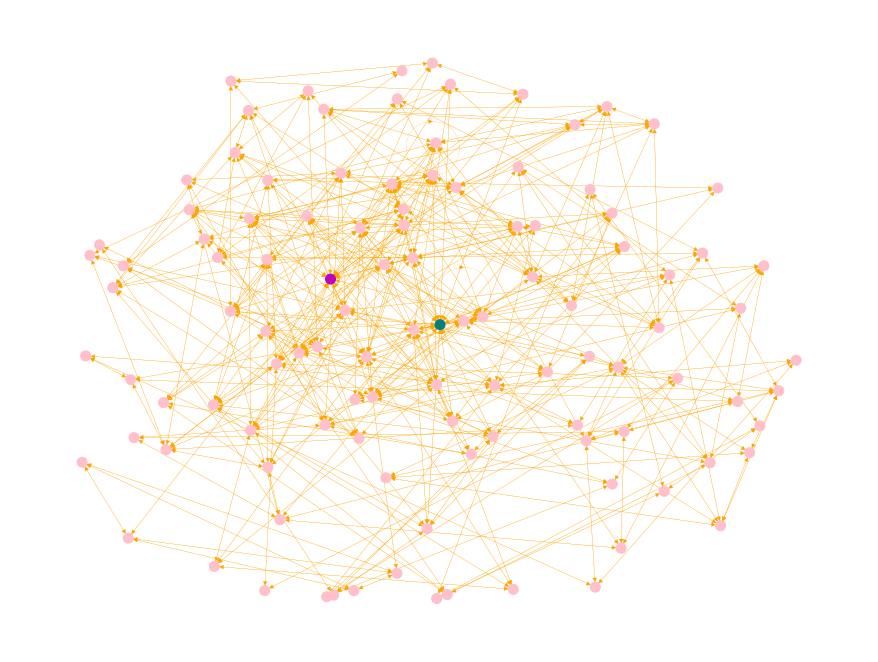

In [72]:
plt.figure(figsize = (12,9) )
nx.draw(Or_G, pos, node_color=colors, node_size=100, edge_color='orange', width = 0.2, with_labels=False)

#### In this dataset, two nodes: 82 and 93 are considered the most central, each with two measures of centrality considering it as the node of highest centrality. 

### 4. Finding and plotting communities in the network
#### Using the Girvan Newman algorithm

<Figure size 432x288 with 0 Axes>

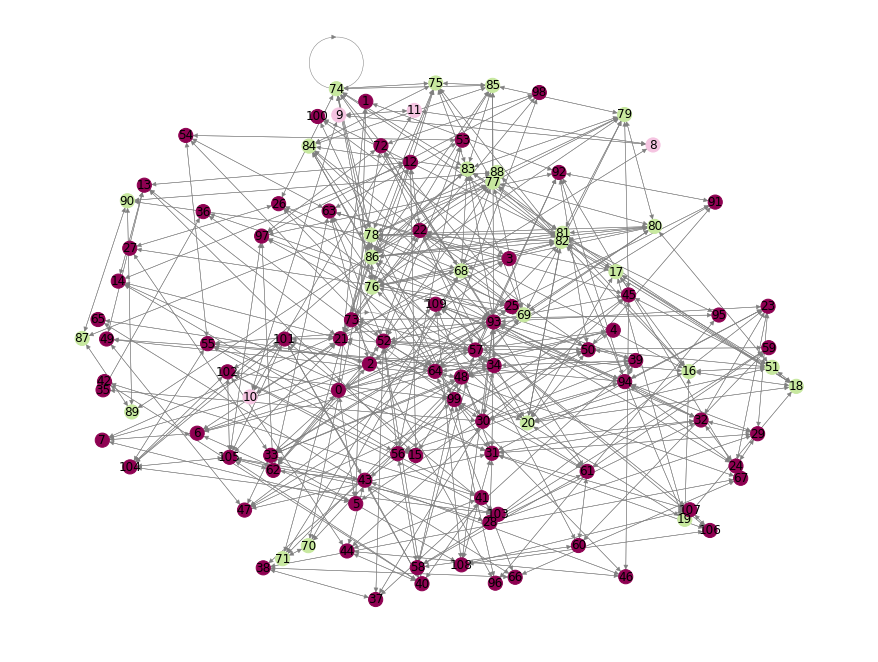

In [65]:
comm = nx.algorithms.community.girvan_newman(Or_G)
gn_communities = tuple(sorted(c) for c in next(comm))
# plotting communities function:
import matplotlib.cm as cmx
def Plot_Comm(Network, C, position = None):
    cmap = cmx.get_cmap(name='PiYG')
    N = len(Network.nodes())
    K = len(C)
    color_map = ['k']*N
    for i in range(K):
        for j in range(len(C[i])):
            color_map[ C[i][j] ] = cmap(i/K)
    if position is None:
        pos = nx.spring_layout(Network, k=0.25,iterations=20)
    else:
        pos = position
    fig = plt.figure()
    plt.figure(figsize = (12,9) )
    nx.draw(Network, pos, node_color=color_map, node_size=200, edge_color='grey', width = 0.5, with_labels=True)
    plt.show()
    return

Plot_Comm(Or_G, gn_communities, pos)

### Do the identified communities make sense given the context of your data?
#### I can see that 8,9,10, and 11 are their own community, and since they are their own component that makes sense. There is also another community in green that is a part of the larger community, but maybe they are a different social class or speak a different langage than other members of the community.

## Conclusion
1. Do you think about this dataset differently than you did before?
2. Did you learn anything about the discipline/domain the network lies in?
3. What's something you wish you could learn about the network that you might not have a tool for?
4. Is there any metadata about the nodes/edges that you wish you could have to interpret your findings better?

#### 1. I wasn't sure what to think about this dataset before, but plotting the network and observing it visually definitely has allowed me to understand it more.
#### 2. @mariia maybe you can answer this better than I can?
#### 3. It would be nice to be able to view the network graph with the communities separated. It could then potentially allow me to see if there is a central node in each community.
#### 4. I wish I could learn more about what happened with nodes 8, 9, 10, 11. I can speculate that there was some error in the data collection, but I am interested in learning about their position in the community. Maybe there is a reason they indicated themselves as removed from the rest of the community. Additionally, not only did those nodes only relate to themselves, nobody else in the community has an edge to any of them. This is particularly interesting because you'd expect that in a village of over 100 people, at least one of them would say they relate to one of those four nodes, but that is not the case. I wonder if they are cast out, new, isolated... 
#### It would also be nice to know maybe how long they'd been a part of the village, and potentially their occupation as well. This could maybe give more insight into why nodes 82 and 93 are considered the most central.